In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# This import allows us to evaluate the accuracy of the model
from sklearn.metrics import r2_score

In [2]:
# Load the data
df = pd.read_csv('house_prices.csv')

# Prepare the data
X = df['square_feet'].values.reshape(-1, 1)
y = df['price'].values.reshape(-1, 1)

# Split the data, 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the first few rows
print("First 5 rows of our data:")
print(df.head())
print("\nData shapes:")
print(f"Training set (X): {X_train.shape}")
print(f"Testing set (X): {X_test.shape}")

First 5 rows of our data:
   square_feet         price
0  2123.620357  5.422026e+05
1  3852.142919  1.212214e+06
2  3195.981825  9.349012e+05
3  2795.975453  6.710930e+05
4  1468.055921  3.435814e+05

Data shapes:
Training set (X): (80, 1)
Testing set (X): (20, 1)


In [3]:
# Create polynomial features (degree=2 for quadratic relationship)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Print the coefficients
coefficients = model.coef_[0]
intercept = model.intercept_[0]
print("Model coefficients:")
print(f"Intercept: ${intercept:,.2f}")
print(f"Coefficient x¹: ${coefficients[1]:,.2f}")
print(f"Coefficient x²: ${coefficients[2]:,.2f}")

Model coefficients:
Intercept: $185,178.08
Coefficient x¹: $27.02
Coefficient x²: $0.06


In [4]:
# Make predictions on test set, allows us to predict y values for new x values
y_pred = model.predict(X_test_poly)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Square Feet': X_test.flatten(),
    'Actual Price': y_test.flatten(),
    'Predicted Price': y_pred.flatten()
})
print("First 5 predictions vs actual values:")
print(comparison_df.head())

# Calculate R² score, which measures how well the model fits the data,
# 1 is a perfect fit, 0 is no fit
r2 = r2_score(y_test, y_pred)
print(f'\nR² Score: {r2:.3f}')

First 5 predictions vs actual values:
   Square Feet  Actual Price  Predicted Price
0  1190.675051  3.227805e+05     3.073105e+05
1  3684.482051  1.122045e+06     1.146136e+06
2  3316.734308  9.198622e+05     9.728286e+05
3  2987.566853  7.995651e+05     8.322589e+05
4  1776.339945  4.749548e+05     4.333966e+05

R² Score: 0.984


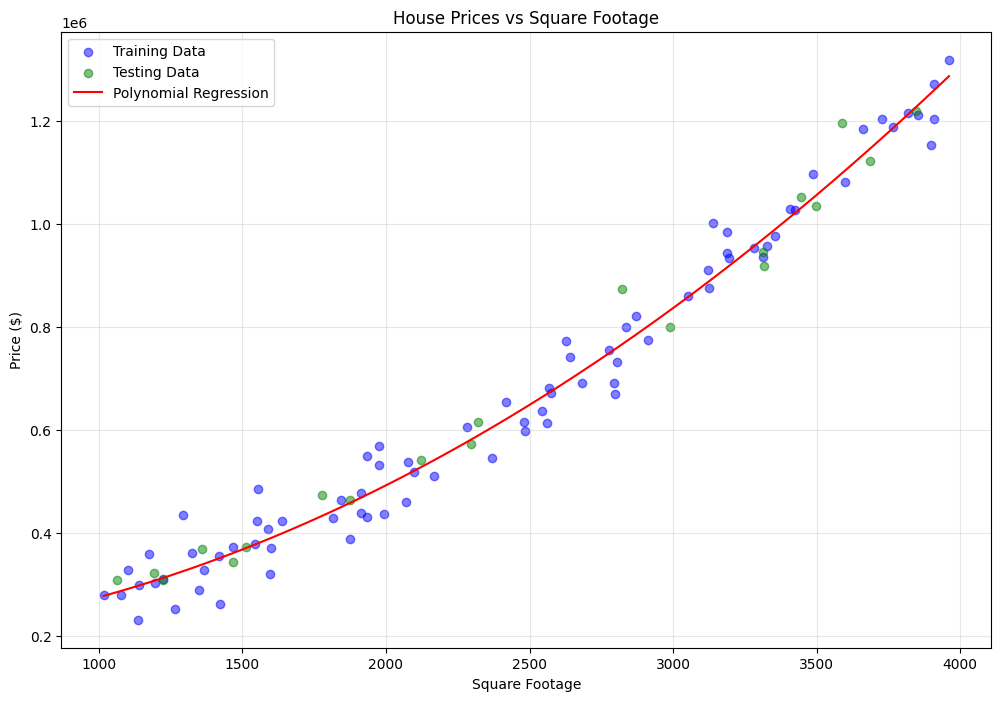

In [5]:
plt.figure(figsize=(12, 8))

# Plot training data (80% of the data)
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Data')
# Plot testing data (20% of the data)
plt.scatter(X_test, y_test, color='green', alpha=0.5, label='Testing Data')

# Create smooth curve for plotting, 300 for better resolution
X_smooth = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

# Transform the smooth curve to match the polynomial features
X_smooth_poly = poly_features.transform(X_smooth)
# Predict y values for the smooth curve
y_smooth = model.predict(X_smooth_poly)

plt.plot(X_smooth, y_smooth, color='red', label='Polynomial Regression')
plt.xlabel('Square Footage')
plt.ylabel('Price ($)')
plt.title('House Prices vs Square Footage')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()